In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data_train = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/training_set_for_turn_detection.xlsx')

In [6]:
data_test = pd.read_csv('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/test.csv')

In [7]:
y_test = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/y_test.xlsx')

In [8]:
data_train.head()

,std,interquartilerange,range,variance,feature
0,1.893093,0.744145,6.10639,3.583801,0
1,12.137999,11.900842,45.21478,147.331026,1
2,3.861983,2.967290,13.48541,14.914914,0
3,2.806293,1.340335,10.49092,7.875282,0
4,4.436192,7.716569,11.91696,19.679798,0


In [9]:
data_test.head()

,time_stamp,ori,Unnamed: 2,Unnamed: 3
0,1582892149513,183.32074,-23.296076,-8.208767
1,1582892149530,183.43580,-23.217299,-8.004543
2,1582892149550,183.55615,-22.962630,-7.778291
3,1582892149570,183.67781,-22.410380,-7.610994
4,1582892149588,183.78986,-22.059351,-7.418176


In [10]:
x_train = data_train.drop('feature', axis=1)

In [11]:
x_train

,std,interquartilerange,range,variance
0,1.893093,0.744145,6.10639,3.583801
1,12.137999,11.900842,45.21478,147.331026
2,3.861983,2.967290,13.48541,14.914914
3,2.806293,1.340335,10.49092,7.875282
4,4.436192,7.716569,11.91696,19.679798
...,...,...,...,...
74,4.342830,3.536580,11.63962,18.860171
75,8.206939,3.040640,26.18744,67.353840
76,0.404348,0.373337,1.47731,0.163497
77,1.453080,1.583342,4.87724,2.111441


In [12]:
y_train = data_train['feature']

In [13]:
y_train

0     0
1     1
2     0
3     0
4     0
     ..
74    0
75    1
76    0
77    0
78    0
Name: feature, Length: 79, dtype: int64

In [14]:
y_test = y_test['feature']

In [15]:
y_test

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
Name: feature, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaled_features = scaler.transform(x_train)

In [20]:
#scaled_features

In [21]:
x_train_df = pd.DataFrame(scaled_features,columns=x_train.columns)
x_train_df.head()

,std,interquartilerange,range,variance
0,-0.706071,-0.378962,-0.705813,-0.615546
1,1.440898,0.384420,1.844643,1.272605
2,-0.293461,-0.226847,-0.224590,-0.466709
3,-0.514696,-0.338169,-0.419876,-0.559176
4,-0.173127,0.098117,-0.326876,-0.404121


In [22]:
# Dividing the data into windows
time_stamp_windows = []

last = len(data_test) // 100

for i in range(last):
    time_stamp_windows.append(data_test.iloc[i*100:i*100+100]['time_stamp'])
    
time_stamp_windows.append(data_test.iloc[last*100:-1]['time_stamp'])

In [23]:
# Dividing the data into windows
windows = []

last = len(data_test) // 100

for i in range(last):
    windows.append(data_test.iloc[i*100:i*100+100]['ori'])
    
windows.append(data_test.iloc[last*100:-1]['ori'])

In [24]:
#windows[0]

In [25]:
firstquart = []
secondquart = []
thirdquart = []
for var in windows: 
    var1quart = var.quantile(.25)
    var2quart = var.quantile(.5)
    var3quart = var.quantile(.75)
    firstquart.append(var1quart.transpose())
    secondquart.append(var2quart.transpose())
    thirdquart.append(var2quart.transpose())
    

In [26]:
i=1
for x in windows:
    y=x
    y.to_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/window/window'+str(i)+'.xlsx')
    y = x.describe()
    y['interquartilerange'] = thirdquart[i-1] - firstquart[i-1]
    y['range'] = y['max'] - y['min']
    y['variance'] = y['std']**2
    y.to_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/feature/feature'+str(i)+'.xlsx')
    i+=1


In [27]:
#y

In [28]:
x_test = pd.DataFrame()
for i in range(1,len(windows)+1):
    df = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/feature/feature'+str(i)+'.xlsx')
    dfff = pd.DataFrame(pd.Series({'std':df.loc[2,'ori'],'interquartilerange':df.loc[8,'ori'],'range':df.loc[9,'ori'], 'variance':df.loc[10,'ori']}))
    new_df=dfff.transpose()
    x_test = x_test.append(new_df.iloc[0])
x_test = x_test[['std','interquartilerange','range','variance']]

    

In [29]:
x_test

,std,interquartilerange,range,variance
0,0.255330,0.229228,1.35521,0.065194
0,5.751575,1.823737,22.84415,33.080610
0,13.717925,16.989567,34.84700,188.181454
0,1.188703,0.956727,3.89319,1.413014
0,1.893093,0.744145,6.10639,3.583801
0,0.853801,0.680217,2.70630,0.728977
0,5.002407,0.893770,17.08059,25.024079
0,17.468361,13.222048,59.73067,305.143644
0,3.635405,1.937928,12.33016,13.216169
0,15.304437,13.086150,55.95564,234.225789


In [30]:
scaler = StandardScaler()
scaler.fit(x_test)
scaled_features1 = scaler.transform(x_test)

In [31]:
scaled_features1

array([[-0.75496098, -0.61704578, -0.72547273, -0.46513178],
       [ 0.46017303, -0.23741937,  0.65970245, -0.01165142],
       [ 2.22140896,  3.37331343,  1.43340511,  2.11872264],
       [-0.54860687, -0.44384009, -0.56187477, -0.4466189 ],
       [-0.39287714, -0.49445246, -0.41921209, -0.41680225],
       [-0.62264837, -0.50967254, -0.63838159, -0.45601444],
       [ 0.29454382, -0.45882922,  0.28818388, -0.12231119],
       [ 3.0505721 ,  2.47632935,  3.03740429,  3.72524655],
       [-0.00767913, -0.21023263, -0.01802842, -0.2844977 ],
       [ 2.57216213,  2.44397441,  2.79406619,  2.75116057],
       [-0.1909828 , -0.3525095 , -0.13658567, -0.35785699],
       [-0.38090569, -0.16675205, -0.38436506, -0.41394597],
       [-0.72201557, -0.58273558, -0.71760218, -0.46378154],
       [-0.57799876, -0.50119736, -0.61002503, -0.45071739],
       [-0.4901572 , -0.29465344, -0.49844299, -0.43702572],
       [-0.63678273, -0.46663598, -0.63217024, -0.4574578 ],
       [-0.19280813,  0.

In [32]:
x_test_df = pd.DataFrame(scaled_features1,columns=x_test.columns)
x_test_df.head()

,std,interquartilerange,range,variance
0,-0.754961,-0.617046,-0.725473,-0.465132
1,0.460173,-0.237419,0.659702,-0.011651
2,2.221409,3.373313,1.433405,2.118723
3,-0.548607,-0.443840,-0.561875,-0.446619
4,-0.392877,-0.494452,-0.419212,-0.416802


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [35]:
predictions = knn.predict(x_test_df)

In [36]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,predictions))

[[28  1]
 [ 0  4]]


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.80      1.00      0.89         4

    accuracy                           0.97        33
   macro avg       0.90      0.98      0.94        33
weighted avg       0.98      0.97      0.97        33



In [40]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_df,y_train)
    pred_i = knn.predict(x_test_df)
    error_rate.append(np.mean(pred_i != y_test))

In [41]:
error_rate

[0.030303030303030304,
 0.030303030303030304,
 0.06060606060606061,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.06060606060606061,
 0.030303030303030304,
 0.06060606060606061,
 0.06060606060606061,
 0.06060606060606061,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304,
 0.030303030303030304]

Text(0, 0.5, 'Error Rate')

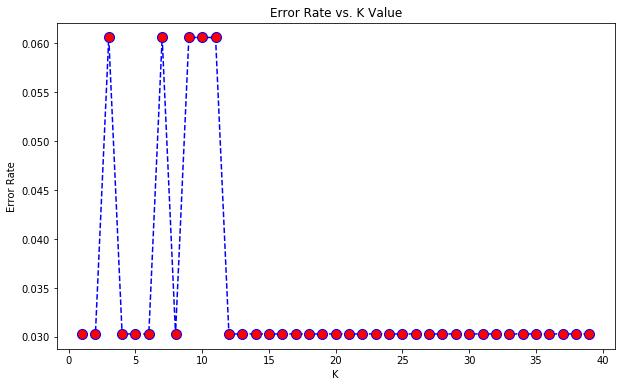

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_df,y_train)
pred = knn.predict(x_test_df)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[28  1]
 [ 0  4]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.80      1.00      0.89         4

    accuracy                           0.97        33
   macro avg       0.90      0.98      0.94        33
weighted avg       0.98      0.97      0.97        33



In [44]:
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(x_train_df,y_train)
pred = knn.predict(x_test_df)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[28  1]
 [ 0  4]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.80      1.00      0.89         4

    accuracy                           0.97        33
   macro avg       0.90      0.98      0.94        33
weighted avg       0.98      0.97      0.97        33



In [45]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train_df,y_train)
pred = knn.predict(x_test_df)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[27  2]
 [ 0  4]]


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.67      1.00      0.80         4

    accuracy                           0.94        33
   macro avg       0.83      0.97      0.88        33
weighted avg       0.96      0.94      0.94        33



In [46]:
# NOW WITH K=8
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train_df,y_train)
pred = knn.predict(x_test_df)

print('WITH K=8')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=8


[[28  1]
 [ 0  4]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.80      1.00      0.89         4

    accuracy                           0.97        33
   macro avg       0.90      0.98      0.94        33
weighted avg       0.98      0.97      0.97        33



In [47]:
# NOW WITH K=35
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(x_train_df,y_train)
pred = knn.predict(x_test_df)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=35


[[28  1]
 [ 0  4]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.80      1.00      0.89         4

    accuracy                           0.97        33
   macro avg       0.90      0.98      0.94        33
weighted avg       0.98      0.97      0.97        33



In [48]:
marker = ['N']*len(windows)

In [49]:
j =0
for i in predictions:
    if i == 1:
        marker[j] = 'LT'
    if i == 2:
        marker[j] = 'RT'
    j=j+1
    

In [50]:
font_dict = {'family':'serif', 'color':'darkred', 'size':15 }

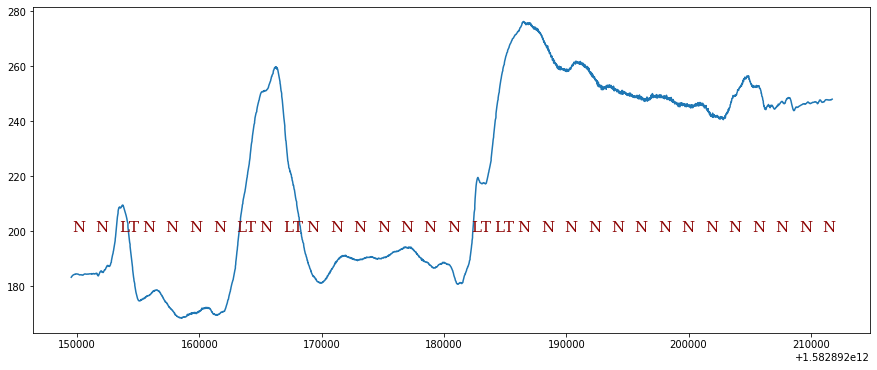

In [51]:
plt.figure(figsize = (15,6))
plt.plot(data_test['time_stamp'], data_test['ori'])
for i in range(len(marker)):
    plt.text(time_stamp_windows[i].iloc[0]+50, 200, marker[i], fontdict = font_dict)
plt.show()

In [52]:
df = pd.read_excel('/home/surbhi/deadline_project/sensor_data_collection/oneplus3/feature/feature'+str(1)+'.xlsx')
   

In [53]:
df

,Unnamed: 0,ori
0,count,100.000000
1,mean,184.356784
2,std,0.255330
3,min,183.320740
4,25%,184.221868
5,50%,184.451095
6,75%,184.539205
7,max,184.675950
8,interquartilerange,0.229228
9,range,1.355210
